The Vanishing Gradient Problem :

The problem:
As more layers using certain activation functions are added to       neural networks, the gradients of the loss function approaches zero, making the network hard to train.

Why:
Certain activation functions, like the sigmoid function, squishes a large input space into a small input space between 0 and 1. Therefore, a large change in the input of the sigmoid function will cause a small change in the output. Hence, the derivative becomes small.

Solutions:

The simplest solution is to use other activation functions, such as ReLU, which doesn’t cause a small derivative.

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

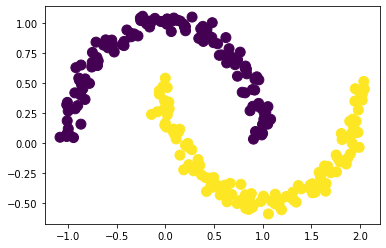

In [3]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [4]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.get_weights()[0]

array([[ 0.18404245,  0.2700578 , -0.1796683 ,  0.4289047 , -0.49278128,
        -0.16220212, -0.5465988 ,  0.25976235,  0.09992492,  0.28631818],
       [-0.49214402,  0.52247757,  0.10643345,  0.4220243 ,  0.01249403,
        -0.41913083,  0.400917  , -0.03765839,  0.11924303,  0.10320246]],
      dtype=float32)

In [7]:
old_weights = model.get_weights()[0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 0.7124 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7048 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.5100
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.5100
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

In [10]:
new_weights = model.get_weights()[0]

In [11]:
model.optimizer.get_config()["learning_rate"]

0.001

In [12]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [13]:
gradient

array([[ -680.3453 ,   283.82428,  -310.81702,  -561.9538 ,   569.8005 ,
         -715.84015,   541.0472 ,   590.6196 ,  -606.09546,  -568.54803],
       [ 1103.66   ,  -634.56476,   462.43475,   954.51483, -1085.3569 ,
         1065.5938 , -1082.2494 ,  -917.213  ,   968.9136 ,   960.5847 ]],
      dtype=float32)

In [14]:
percent_change

array([[ 369.6676  ,  105.09761 ,  172.99492 ,  131.02068 ,  115.62949 ,
         441.32602 ,   98.984344,  227.36925 ,  606.5509  ,  198.57213 ],
       [ 224.25552 ,  121.453026,  434.48254 ,  226.17532 , 8687.007   ,
         254.23897 ,  269.9435  , 2435.6138  ,  812.5537  ,  930.77704 ]],
      dtype=float32)

In [15]:
old_weights

array([[ 0.18404245,  0.2700578 , -0.1796683 ,  0.4289047 , -0.49278128,
        -0.16220212, -0.5465988 ,  0.25976235,  0.09992492,  0.28631818],
       [-0.49214402,  0.52247757,  0.10643345,  0.4220243 ,  0.01249403,
        -0.41913083,  0.400917  , -0.03765839,  0.11924303,  0.10320246]],
      dtype=float32)

In [16]:
new_weights

array([[ 0.86438775, -0.0137665 ,  0.13114873,  0.99085855, -1.0625818 ,
         0.55363804, -1.087646  , -0.33085737,  0.7060204 ,  0.85486627],
       [-1.5958041 ,  1.1570424 , -0.35600132, -0.53249055,  1.0978509 ,
        -1.4847246 ,  1.4831663 ,  0.8795547 , -0.8496706 , -0.8573823 ]],
      dtype=float32)

In [17]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
old_weights = model.get_weights()[0]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 2s 7ms/step - loss: 0.6924 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6900 - accuracy: 0.5400
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6868 - accuracy: 0.7550
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6821 - accuracy: 0.7500
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6733 - accuracy: 0.8400
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6630 - accuracy: 0.8550
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6493 - accuracy: 0.8800
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6328 - accuracy: 0.8800
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6081 - accuracy: 0.8600
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5760 - accuracy: 0.8550
Epoch 11/100
7/7 [=========

In [22]:
new_weights = model.get_weights()[0]

In [23]:
model.optimizer.get_config()["learning_rate"]

0.001

In [24]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [25]:
gradient

array([[ 238.1037  ,    8.366286,  -25.899588,  -39.772747,   -4.219502,
         146.7252  ,   11.92063 ,  -25.667309,  -32.940685,   34.258266],
       [ -29.849901,   24.193523,   75.90496 ,   62.46665 , -164.69519 ,
        -209.34384 ,   33.327938,  -13.049423,   90.38502 ,  -11.896818]],
      dtype=float32)

In [26]:
percent_change

array([[ 55.869396 ,   1.5076709,   4.005221 ,   8.081712 ,   0.9096341,
        169.42677  ,   1.9219062,   3.7337885,   6.117841 ,  30.70192  ],
       [ 22.507624 ,   3.7737753,  12.581471 ,  17.776312 ,  24.384586 ,
         35.327286 ,  46.407158 ,   1.8619287,  19.620298 ,   3.2026446]],
      dtype=float32)

In [27]:
old_weights

array([[-0.42617914,  0.55491465,  0.6466457 ,  0.49213272,  0.46386808,
         0.08660096,  0.6202504 ,  0.6874334 ,  0.5384365 ,  0.11158347],
       [ 0.13262129,  0.64109606,  0.60330755, -0.3514039 ,  0.675407  ,
        -0.592584  ,  0.07181638,  0.7008552 , -0.46067095,  0.3714686 ]],
      dtype=float32)

In [28]:
new_weights

array([[-0.66428286,  0.54654837,  0.6725453 ,  0.5319055 ,  0.46808758,
        -0.06012425,  0.6083298 ,  0.71310073,  0.57137716,  0.0773252 ],
       [ 0.16247119,  0.61690253,  0.5274026 , -0.41387054,  0.8401022 ,
        -0.38324016,  0.03848844,  0.7139046 , -0.55105597,  0.38336542]],
      dtype=float32)

Solution :

   1:Reduce model complexity(if your model contains large hidden layers use few hidden layer(shallow network) but it is not recommmended for solving complex problem 

   2:Use Relu activation function 